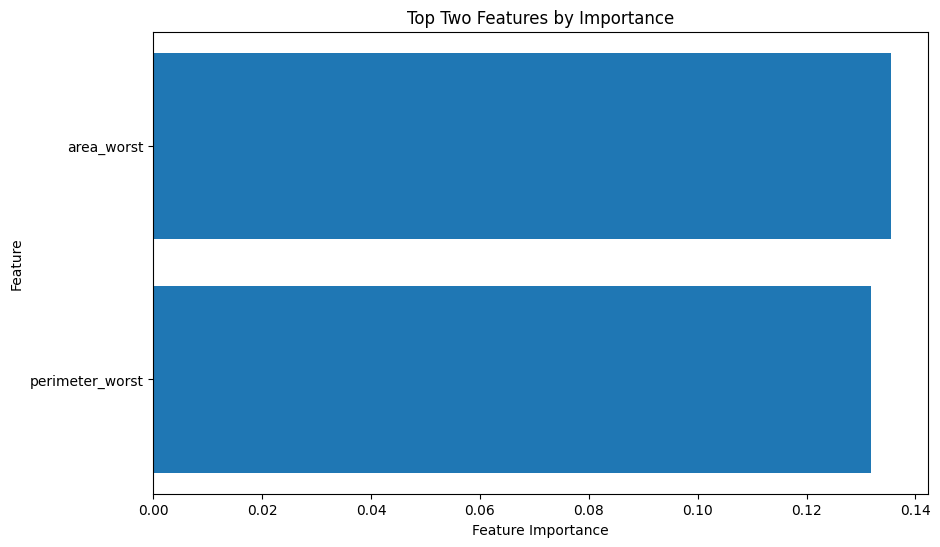

Training Time: 0.26 seconds


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Preprocess the data if needed
df_cleaned = df.dropna()

# Split features and target variable
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Track training time
start_time = time.time()

# Fit the model
rf_model.fit(X_train, y_train)

# Calculate training time
training_time = time.time() - start_time

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Visualize feature importances
top_features = 2
top_indices = sorted_indices[:top_features]
top_feature_names = X.columns[top_indices]
top_importances = feature_importances[top_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(top_features), top_importances, align='center')
plt.yticks(range(top_features), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Two Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

print(f"Training Time: {training_time:.2f} seconds")
